In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import warnings

warnings.filterwarnings("ignore")

In [19]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [20]:
from seirsplus.networks import generate_demographic_contact_network, household_country_data
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

## Initialize `G_baseline` network

In [28]:
random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.01)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10

Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


## Reproducibility of Node2Vec

In [ ]:
from seirsplus.assignment import embed_nodes

In [35]:
for _ in range(5):
    test_model = ViralExtSEIRNetworkModel(
        G = G,
        beta = 0.5,
        sigma = 0.2,
        lamda = 0.5,
        gamma  = 0.25,
        seed = 0,
        initE = INIT_EXPOSED,
    )
    print([i for i in range(test_model.X.shape[0]) if test_model.X[i] != 1])
    
    random.seed(0)
    np.random.seed(0)
    
    embedding, node2vec_model = embed_nodes(test_model.G)
    print(embedding[:2, :2])

[202, 254, 314, 740, 754, 807, 840, 857, 926, 959]


/home/jw2529/.conda/envs/py39/lib/python3.9/site-packages/networkx/linalg/graphmatrix.py:187: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  return adjacency_matrix(G, nodelist, dtype, weight)


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.88it/s]


[[-0.42477798  0.9617271 ]
 [ 0.10694666 -0.68370044]]
[202, 254, 314, 740, 754, 807, 840, 857, 926, 959]


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.87it/s]


[[-0.42477798  0.9617271 ]
 [ 0.10694666 -0.68370044]]
[202, 254, 314, 740, 754, 807, 840, 857, 926, 959]


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.63it/s]


[[-0.42477798  0.9617271 ]
 [ 0.10694666 -0.68370044]]
[202, 254, 314, 740, 754, 807, 840, 857, 926, 959]


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.92it/s]


[[-0.42477798  0.9617271 ]
 [ 0.10694666 -0.68370044]]
[202, 254, 314, 740, 754, 807, 840, 857, 926, 959]


Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.90it/s]


[[-0.42477798  0.9617271 ]
 [ 0.10694666 -0.68370044]]


## Reproducibility of simulation

Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.90it/s]


[10, 11, 20, 27, 28, 48, 56, 64, 65, 73]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 25.11it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.52it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.39it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.88it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 20.73it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.27it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.50it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.68it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 36.15it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.41it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.24it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.47it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 30.69it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 25.89it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 18.45it/s]


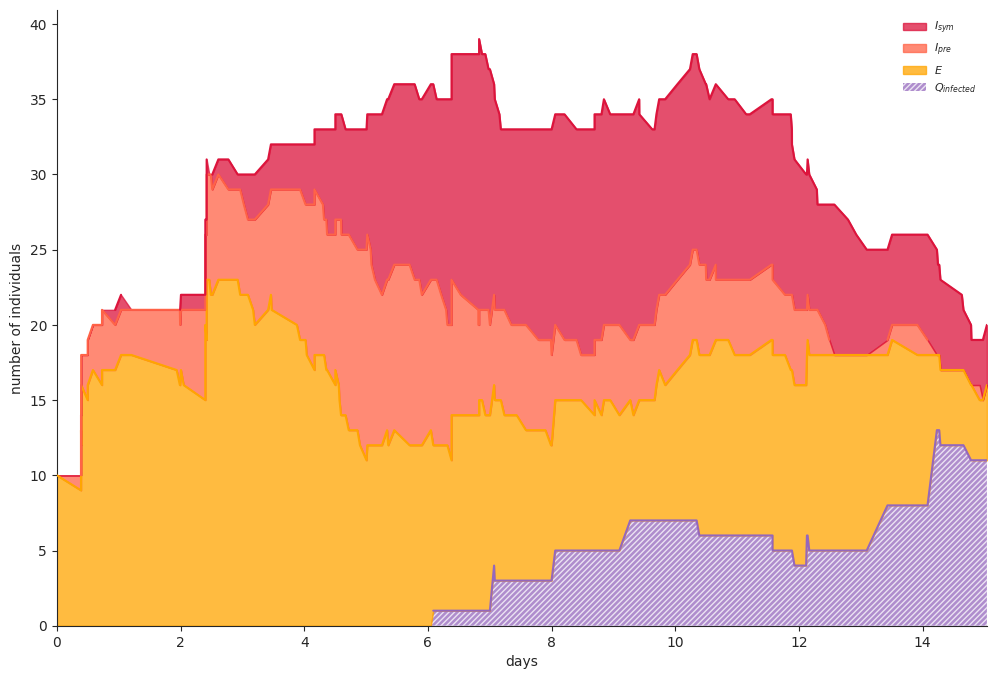

Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.93it/s]


[10, 11, 20, 27, 28, 48, 56, 64, 65, 73]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 23.17it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.48it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 61.43it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.99it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.22it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 66.14it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.35it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.22it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 70.20it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.52it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.39it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.67it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.94it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.07it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 21.43it/s]


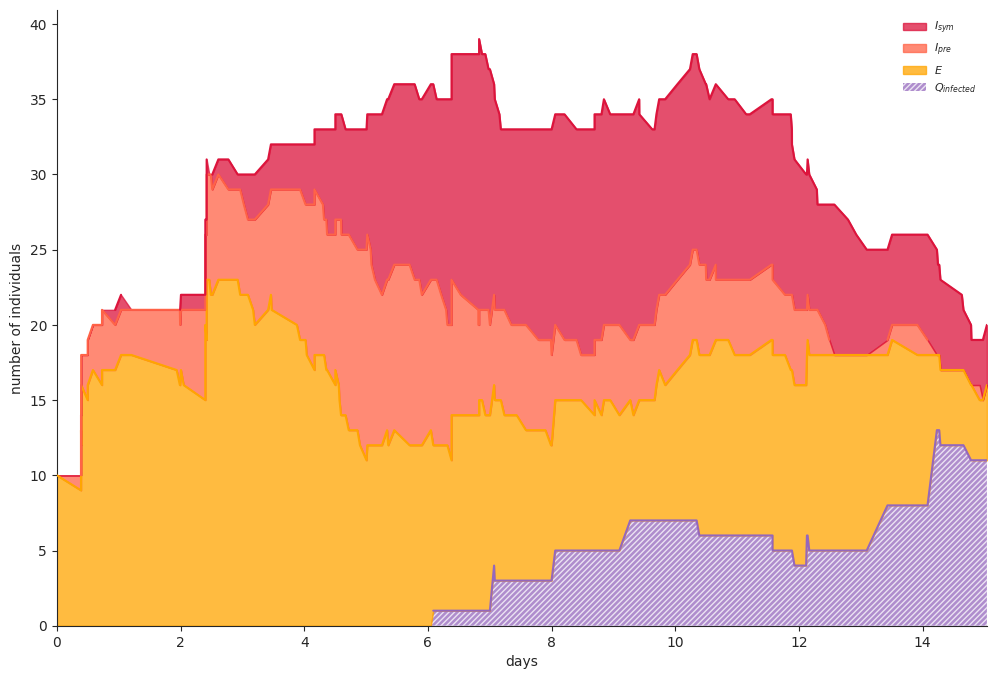

Computing transition probabilities:   0%|          | 0/1000 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.88it/s]


[10, 11, 20, 27, 28, 48, 56, 64, 65, 73]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.98it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.63it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.05it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.38it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 28.15it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 62.86it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 63.26it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 22.65it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 69.80it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.76it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.18it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.25it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.24it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 29.11it/s]


Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 40.27it/s]


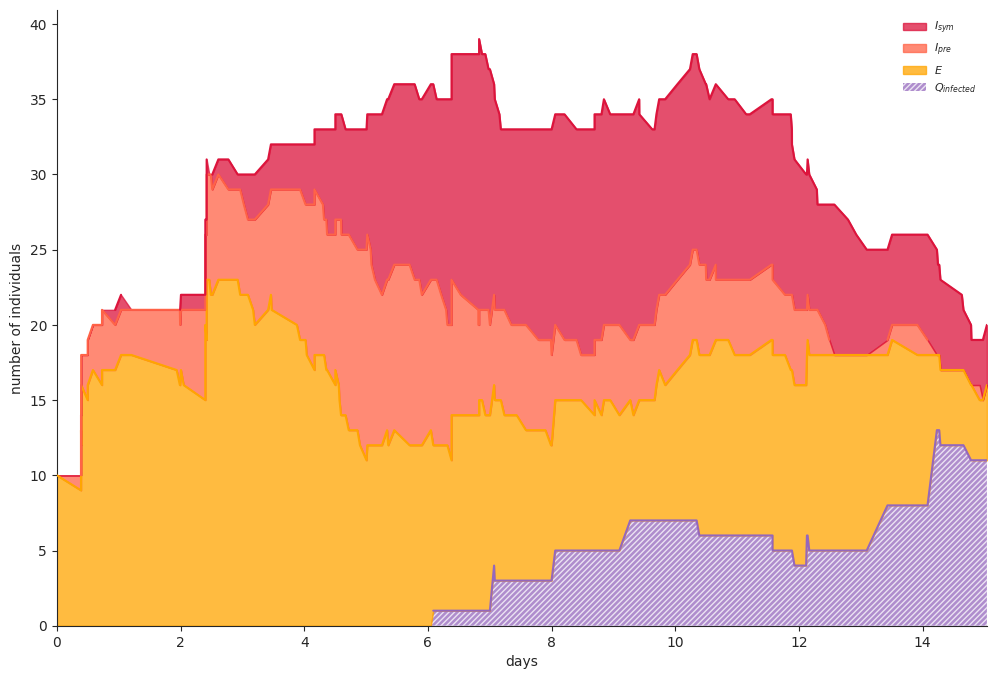

In [38]:
for _ in range(3):
    test_model = ViralExtSEIRNetworkModel(
        G = G,
        beta = 0.5,
        sigma = 0.2,
        lamda = 0.5,
        gamma  = 0.25,
        seed = 0,
        initE = INIT_EXPOSED,
    )
    sim_correlated = SimulationRunner(
        model=test_model,
        pooling_strategy='correlated',
        T = 15,
        num_groups = 10,
        pool_size = 5,
        seed = 0,
        save_results=False,
    )
    print(sim_correlated.screening_groups[0][:10])
    sim_correlated.run_simulation()
    sim_correlated.model.figure_infections(plot_percentages=False)